In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [18]:
df = pd.read_csv(r'E:\Dokumenty\GitHub\gold-forecast\data\data_nominal_clean.csv',sep=';')
df['date'] = pd.to_datetime(df['date'])
df_chg= df.set_index(['date'], drop=True)
df_chg.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


<AxesSubplot:xlabel='date'>

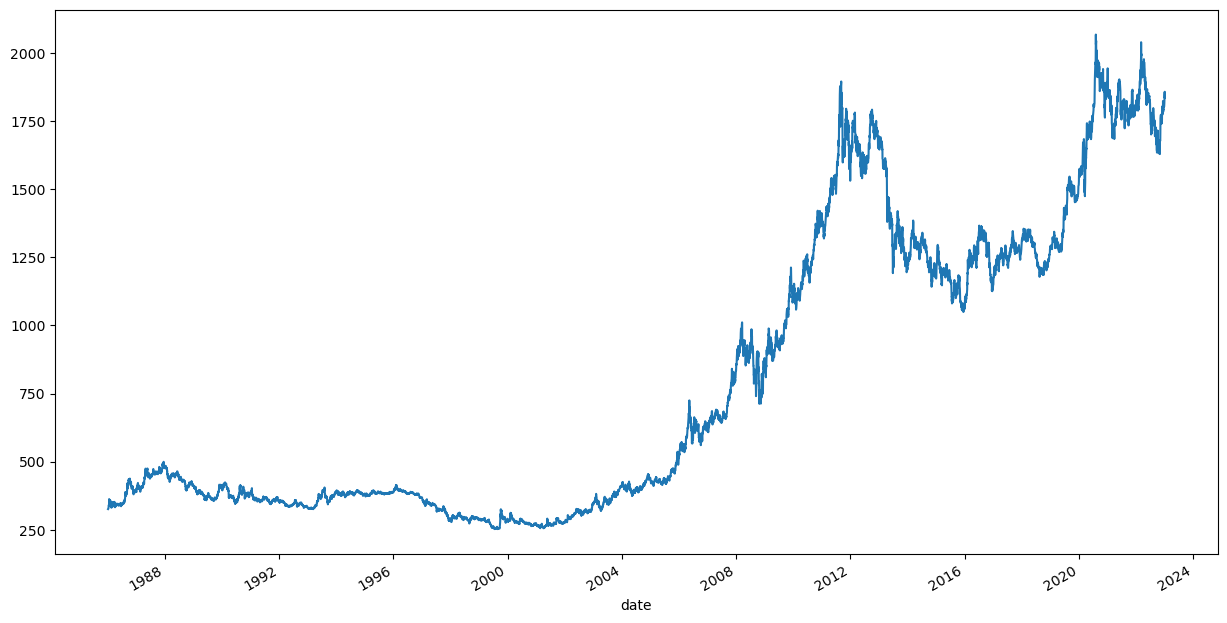

In [19]:
plt.figure(figsize=(15,8))
df_chg['Gold'].plot()

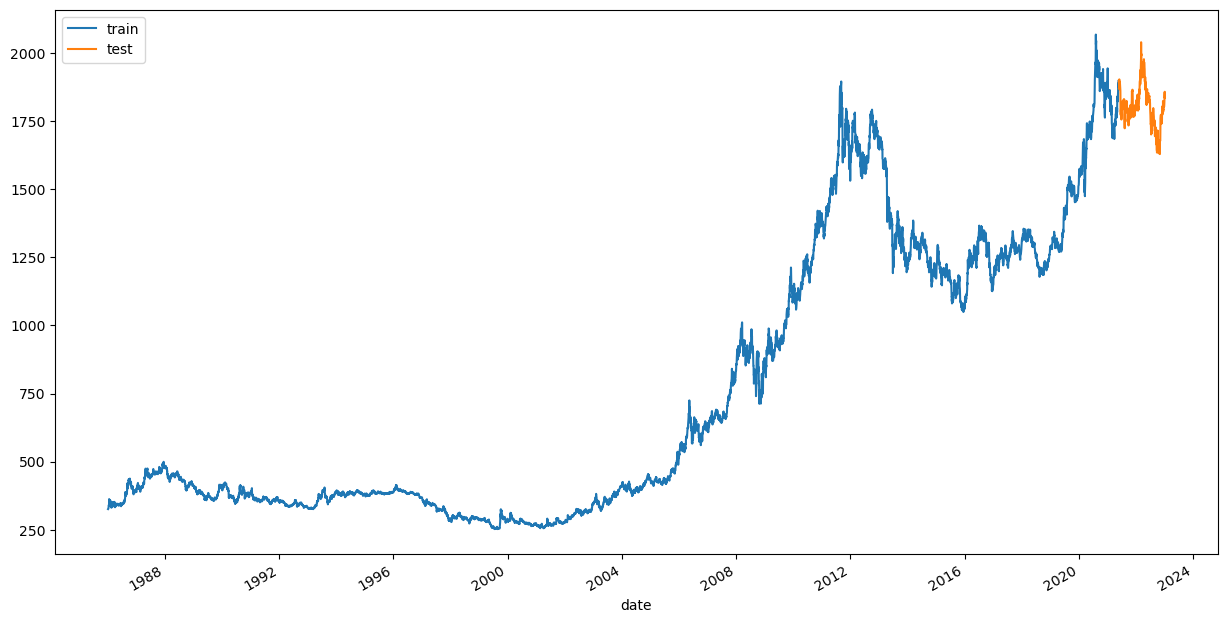

In [20]:
split_date = pd.Timestamp('2021-05-27')
df1 = df_chg['Gold']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [21]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 8754 train values
We have 396 test values


In [22]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:8754:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[8754:10947:1]

In [23]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [24]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [25]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
8753/8753 [==============================] - 9s 958us/step - loss: 0.0170
Epoch 2/100
8753/8753 [==============================] - 6s 733us/step - loss: 9.5010e-04
Epoch 3/100
8753/8753 [==============================] - 7s 804us/step - loss: 4.5724e-04
Epoch 4/100
8753/8753 [==============================] - 6s 728us/step - loss: 3.7004e-04
Epoch 5/100
8753/8753 [==============================] - 6s 727us/step - loss: 2.9451e-04
Epoch 6/100
8753/8753 [==============================] - 7s 752us/step - loss: 2.8549e-04
Epoch 7/100
8753/8753 [==============================] - 6s 727us/step - loss: 2.8781e-04
Epoch 8/100
8753/8753 [==============================] - 6s 727us/step - loss: 2.6701e-04
Epoch 9/100
8753/8753 [==============================] - 6s 736us/step - loss: 2.5004e-04
Epoch 10/100
8753/8753 [==============================] - 7s 783us/step - loss: 2.4994e-04
Epoch 11/100
8753/8753 [==============================] - 7s 806us/step - loss: 2.4742e-04
Epoch 12/100

In [26]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.712
The R2 score on the Test set is:	0.744


In [27]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)

394/394 [==============================] - 1s 1ms/step - loss: 0.0018
NN: 0.001786


In [31]:
nn_y_pred_test = nn_model.predict(X_test)
nn_y_pred_test_inv = scaler.inverse_transform(nn_y_pred_test)

y_test_inv = scaler.inverse_transform(y_test)

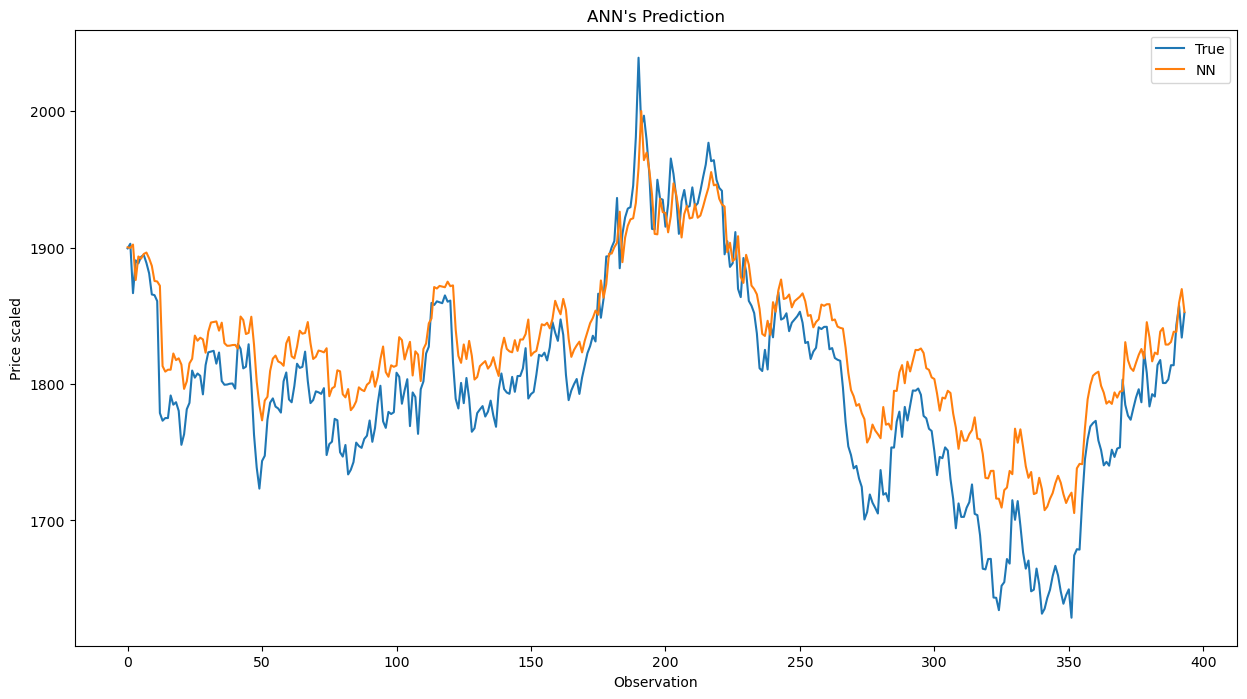

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_inv, label='True')
plt.plot(nn_y_pred_test_inv, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Price scaled')
plt.legend()
plt.show()